In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv')
data

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1/4/2019 16:01,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,...,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN
3200,1/4/2019 15:54,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,...,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN
3201,1/4/2019 8:31,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,...,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN
3202,1/2/2019 16:06,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,...,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at               3204 non-null   object 
 1   order_id                 3204 non-null   object 
 2   rent_channel             3204 non-null   object 
 3   payment_method           3201 non-null   object 
 4   car                      3121 non-null   object 
 5   car__owner__user_status  3121 non-null   object 
 6   car__brand               3121 non-null   object 
 7   car__model               3121 non-null   object 
 8   rental_category          3195 non-null   object 
 9   total_period             3204 non-null   float64
 10  price_per_day            3204 non-null   float64
 11  total_price              3204 non-null   float64
 12  insurance_price          3203 non-null   float64
 13  insurance_amount         3204 non-null   int64  
 14  vat_amount              

In [4]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [5]:
data['month'] = data['created_at'].dt.month

In [6]:
data.head(5)

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at,month
0,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN,12
1,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN,12
2,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN,12
3,2019-12-30 23:05:00,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN,12
4,2019-12-30 20:28:00,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN,12


In [7]:
data.isnull().sum()

created_at                    0
order_id                      0
rent_channel                  0
payment_method                3
car                          83
car__owner__user_status      83
car__brand                   83
car__model                   83
rental_category               9
total_period                  0
price_per_day                 0
total_price                   0
insurance_price               1
insurance_amount              0
vat_amount                    0
commission                    0
discount_amount               1
promotion_amount              0
redeem_amount                 1
total_amount                  0
hold_amount                   0
tax_withholding               1
status                        0
confirm_at                    0
complete_at                1100
cancel_at                  2929
month                         0
dtype: int64

In [8]:
#Delete complete_at and cancel_at
data = data.drop(columns=['complete_at', 'cancel_at'])

In [9]:
df = data.dropna()
df.isnull().sum()

created_at                 0
order_id                   0
rent_channel               0
payment_method             0
car                        0
car__owner__user_status    0
car__brand                 0
car__model                 0
rental_category            0
total_period               0
price_per_day              0
total_price                0
insurance_price            0
insurance_amount           0
vat_amount                 0
commission                 0
discount_amount            0
promotion_amount           0
redeem_amount              0
total_amount               0
hold_amount                0
tax_withholding            0
status                     0
confirm_at                 0
month                      0
dtype: int64

In [10]:
df.head(5)

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,month
0,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,8910.0,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,12
1,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,425.0,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,12
2,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,70.0,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,12
3,2019-12-30 23:05:00,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,99.0,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,12
4,2019-12-30 20:28:00,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,425.0,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,12


In [11]:
#In column status it have cancel and fail. So I delete
df = df[~(df['status'] == 'cancel')]
df = df[~(df['status'] == 'fail')]

In [12]:
month = range(1,13)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


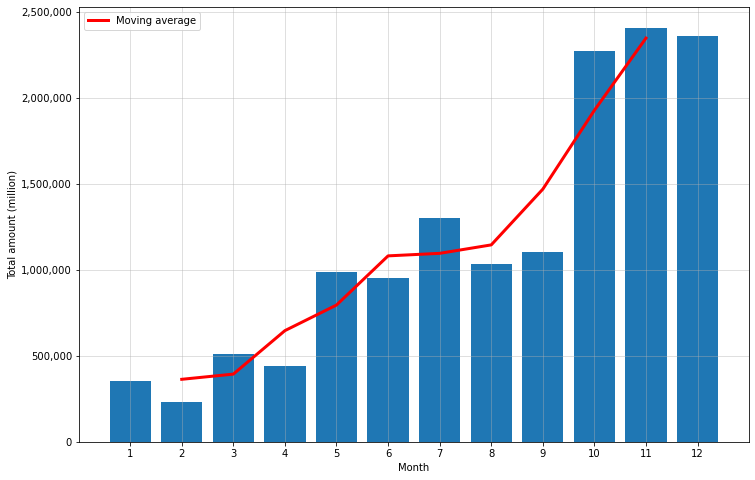

In [13]:
#I want to know which month have most the total_amount value.So November is most total amount.
dat = df.groupby(['month'])['total_amount'].sum()
ma = dat.rolling(window = 3, center=True).mean()
plt.figure(figsize=(12,8))
plt.bar(month, dat)
plt.plot(ma, c='r', linewidth=3, label='Moving average')
plt.ylabel('Total amount (million)')
plt.xlabel('Month')
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(month)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [14]:
dat

month
1      351839.54
2      229916.25
3      508419.86
4      442491.05
5      988272.67
6      954940.00
7     1300227.27
8     1032362.29
9     1102438.82
10    2273078.98
11    2408334.30
12    2361254.41
Name: total_amount, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

X = np.arange(1, 13).reshape(-1,1)
y = dat.values

linear = LinearRegression().fit(X, y)
print('model acc =', linear.score(X, y))

X_fit = np.arange(1, 16).reshape(-1,1)
y_linear = linear.predict(X_fit)
print(y_linear)

model acc = 0.8590006287324841
[  50504.97564103  252740.06249417  454975.14934732  657210.23620047
  859445.32305361 1061680.40990676 1263915.49675991 1466150.58361305
 1668385.6704662  1870620.75731935 2072855.84417249 2275090.93102564
 2477326.01787879 2679561.10473194 2881796.19158508]


In [16]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

X_ = transformer.fit_transform(X)

poly = LinearRegression().fit(X_, y)
print('model acc =', poly.score(X_, y))

X_fit_ = transformer.fit_transform(X_fit)
y_poly = poly.predict(X_fit_)
print(y_poly)

model acc = 0.8948733446940147
[ 298512.5478022   365470.77711289  459484.37793207  580553.35025974
  728677.6940959   903857.40944056 1106092.49629371 1335382.95465534
 1591728.78452547 1875129.9859041  2185586.55879121 2523098.50318681
 2887665.81909091 3279288.5065035  3697966.56542458]


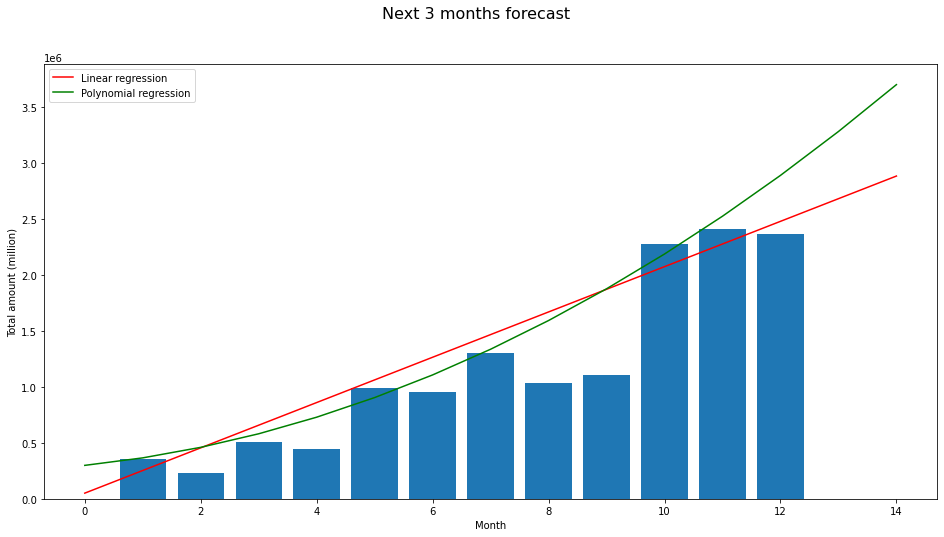

In [17]:
#This graph show about next 3 months forecast
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.bar(dat.index, dat.values)
#Plot the regression model
plt.plot(y_linear, color='r', label='Linear regression')
#Plot the future predictions
plt.plot(y_poly, color='g', label='Polynomial regression')
#Set the title of the graph
plt.suptitle('Next 3 months forecast', fontsize=16)
plt.ylabel('Total amount (million)')
plt.xlabel('Month')
plt.legend()
#display the graph
plt.show()

Text(0.5, 1.0, 'Car Brand')

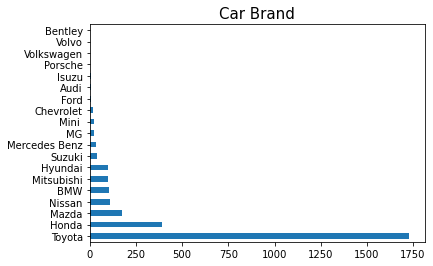

In [18]:
#Car Brand praph. So can see with car brand is mostly
Brand = df['car__brand'].unique()
df['car__brand'].value_counts()[:20].plot(kind='barh')
plt.title('Car Brand',fontsize=15)

Text(0.5, 1.0, 'Car Model')

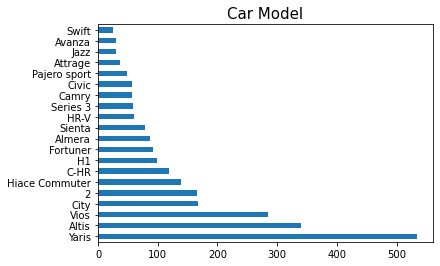

In [19]:
#Car Model praph. So can see with car model is mostly
Model = df['car__model'].unique()
df['car__model'].value_counts()[:20].plot(kind='barh')
plt.title('Car Model',fontsize=15)

In [20]:
df['rent_channel'] = df['rent_channel'].replace({'android':'web', 'ios':'web'})
Channel_count = df['rent_channel'].value_counts()
Channel_count

web      1977
phone     632
line      245
Name: rent_channel, dtype: int64

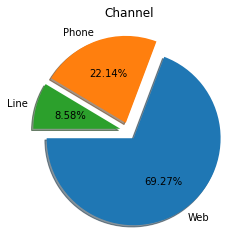

In [21]:
#With channel is mostly
explode = (0.1, 0.1, 0.1)
label = ['Web','Phone','Line']
fig, ax = plt.subplots()
ax.pie(Channel_count,
       explode=explode,
       labels=label,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.set_title('Channel')
plt.show()

In [22]:
df.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month
count,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,3.397162,1468.933013,4344.876142,155.227782,422.841626,321.417634,1023.831983,96.974912,86.962999,4.344779,4889.129446,3847.233006,29.691969,8.936230
std,5.988161,1903.488419,9700.759786,217.387449,875.795378,680.829129,3926.384229,814.464584,439.244938,43.530349,10353.428322,4815.466089,172.223864,2.795168
min,1.000000,350.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,800.000000,1200.000000,0.000000,0.000000,89.600000,212.500000,0.000000,0.000000,0.000000,1364.887500,0.000000,0.000000,7.000000
50%,2.000000,1000.000000,2400.000000,0.000000,0.000000,175.000000,500.000000,0.000000,0.000000,0.000000,2652.800000,5000.000000,0.000000,10.000000
75%,3.000000,1500.000000,4357.500000,280.000000,560.000000,329.350000,987.500000,0.000000,0.000000,0.000000,4968.812500,5000.000000,0.000000,11.000000
max,90.000000,62000.000000,233644.850000,710.000000,14880.000000,16355.130000,180000.000000,25000.000000,8820.000000,600.000000,250000.000000,30000.000000,4250.000000,12.000000


In [23]:
#Use status as target in classification
num_columns = data.describe().columns
obj_columns = data.columns[data.dtypes=='object'].drop('status')

In [24]:
# Delete outliers
df = data
factor = 3
for col in num_columns:
    upper = data[col].mean() + data[col].std()*factor
    lower = data[col].mean() - data[col].std()*factor
    df = df[df[col] <= upper]
    df = df[df[col] >= lower]
df.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,2.237370,1275.639721,2797.361351,140.781082,322.167682,214.185187,620.689255,17.052060,43.908008,0.214977,3260.494670,2981.011465,16.494896,9.049445
std,1.660364,1052.605494,2643.836176,201.400738,547.672555,198.602781,635.663148,139.506243,198.053918,4.632402,3023.404376,2861.686451,63.313312,2.681356
min,1.000000,390.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.930000,0.000000,0.000000,1.000000
25%,1.000000,800.000000,1065.000000,0.000000,0.000000,84.000000,186.915000,0.000000,0.000000,0.000000,1284.000000,0.000000,0.000000,7.000000
50%,2.000000,1000.000000,2000.000000,0.000000,0.000000,161.000000,450.000000,0.000000,0.000000,0.000000,2439.600000,5000.000000,0.000000,10.000000
75%,3.000000,1350.000000,3580.000000,280.000000,560.000000,264.075000,779.700000,0.000000,0.000000,0.000000,4012.500000,5000.000000,0.000000,11.000000
max,20.000000,16000.000000,24000.000000,710.000000,2900.000000,1878.800000,6000.000000,2500.000000,1500.000000,100.000000,28718.800000,10000.000000,550.000000,12.000000


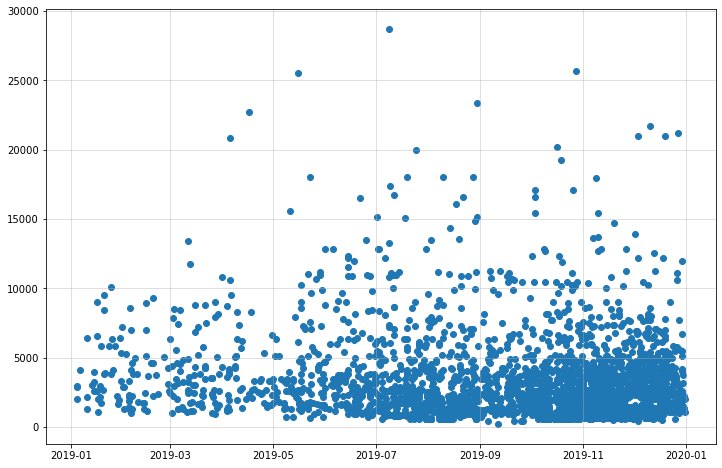

In [25]:
#The scatter graph shows the period of 2019, the 11th month, where the most car rentals are available for prices under 5000.
x = df['created_at']
y = df['total_amount']
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.grid(alpha=0.5)
plt.show()

In [26]:
#Log transformation
dflog = df[num_columns].applymap(lambda x: np.log(x+1))
cols = [*obj_columns, 'status', 'created_at']
dflog = dflog.join(df[cols])
dflog.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,month
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,1.081799,7.001027,7.610624,2.170763,2.406840,5.042605,6.011367,0.129902,0.408707,0.009921,7.761108,4.738874,0.451263,2.255432
std,0.406100,0.483387,0.794173,2.850098,3.194946,0.815352,0.954750,0.920272,1.562102,0.213791,0.808496,4.264878,1.448822,0.361599
min,0.693147,5.968708,5.968708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.365649,0.000000,0.000000,0.693147
25%,0.693147,6.685861,6.971570,0.000000,0.000000,4.442651,5.235990,0.000000,0.000000,0.000000,7.158514,0.000000,0.000000,2.079442
50%,1.098612,6.908755,7.601402,0.000000,0.000000,5.087596,6.111467,0.000000,0.000000,0.000000,7.799999,8.517393,0.000000,2.397895
75%,1.386294,7.208600,8.183397,5.638355,6.329721,5.580011,6.660191,0.000000,0.000000,0.000000,8.297419,8.517393,0.000000,2.484907
max,3.044522,9.680406,10.085851,6.566672,7.972811,7.538921,8.699681,7.824446,7.313887,4.615121,10.265342,9.210440,6.311735,2.564949


In [27]:
#One hot encoding
df_ohe = dflog
for col in obj_columns.drop(['order_id', 'car']):
    cat_list = 'col'+'_'+col
    cat_list = pd.get_dummies(df_ohe[col], prefix=col)
    df_ohe = df_ohe.join(cat_list)
df_ohe = df_ohe.drop(columns=[*obj_columns, 'created_at'])
df_ohe.columns

Index(['total_period', 'price_per_day', 'total_price', 'insurance_price',
       'insurance_amount', 'vat_amount', 'commission', 'discount_amount',
       'promotion_amount', 'redeem_amount',
       ...
       'confirm_at_9/5/2019 8:53', 'confirm_at_9/6/2019 10:02',
       'confirm_at_9/6/2019 21:46', 'confirm_at_9/6/2019 9:29',
       'confirm_at_9/7/2019 9:14', 'confirm_at_9/9/2019 17:29',
       'confirm_at_9/9/2019 17:51', 'confirm_at_9/9/2019 17:54',
       'confirm_at_9/9/2019 23:12', 'confirm_at_9/9/2019 9:47'],
      dtype='object', length=2736)

In [28]:
df_ohe['status'].value_counts()

complete    2536
cancel       224
success       29
failed         2
Name: status, dtype: int64

In [29]:
df_ohe.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,...,confirm_at_9/5/2019 8:53,confirm_at_9/6/2019 10:02,confirm_at_9/6/2019 21:46,confirm_at_9/6/2019 9:29,confirm_at_9/7/2019 9:14,confirm_at_9/9/2019 17:29,confirm_at_9/9/2019 17:51,confirm_at_9/9/2019 17:54,confirm_at_9/9/2019 23:12,confirm_at_9/9/2019 9:47
status,,,,,,,,,,,,,,,,,,,,,
cancel,1.100040,6.985685,7.627369,1.912798,2.111670,5.012041,5.910991,0.024199,0.263304,0.000000,...,0.000000,0.000000,0.000000,0.004464,0.004464,0.004464,0.000000,0.000000,0.004464,0.004464
complete,1.077820,7.003351,7.606354,2.213342,2.454180,5.043414,6.017207,0.140826,0.419010,0.010919,...,0.000394,0.000394,0.000394,0.000000,0.000000,0.000000,0.000394,0.000394,0.000000,0.000000
failed,0.895880,7.143569,7.489893,0.000000,0.000000,4.838074,5.882701,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
success,1.301665,6.906380,7.863013,0.589633,0.712958,5.222041,6.284842,0.000000,0.659051,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
#Delete failed status
df_ohe = df_ohe[df['status']!='failed']
df_ohe['status'].value_counts()

complete    2536
cancel       224
success       29
Name: status, dtype: int64

In [31]:
#Split out success status because don't know complete or cancel
df_succ = df_ohe[df['status']=='success']
df_succ['status'].value_counts()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


success    29
Name: status, dtype: int64

In [32]:
df_ohe = df_ohe[df['status']!='success']
old_values = ['complete', 'cancel']
new_values = [1, 0]
df_ohe['status'] = df_ohe['status'].replace(old_values, new_values)
df_ohe['status'].value_counts()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1    2536
0     224
Name: status, dtype: int64

In [33]:
df_ohe.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,...,confirm_at_9/5/2019 8:53,confirm_at_9/6/2019 10:02,confirm_at_9/6/2019 21:46,confirm_at_9/6/2019 9:29,confirm_at_9/7/2019 9:14,confirm_at_9/9/2019 17:29,confirm_at_9/9/2019 17:51,confirm_at_9/9/2019 17:54,confirm_at_9/9/2019 23:12,confirm_at_9/9/2019 9:47
status,,,,,,,,,,,,,,,,,,,,,
0,1.10004,6.985685,7.627369,1.912798,2.11167,5.012041,5.910991,0.024199,0.263304,0.000000,...,0.000000,0.000000,0.000000,0.004464,0.004464,0.004464,0.000000,0.000000,0.004464,0.004464
1,1.07782,7.003351,7.606354,2.213342,2.45418,5.043414,6.017207,0.140826,0.419010,0.010919,...,0.000394,0.000394,0.000394,0.000000,0.000000,0.000000,0.000394,0.000394,0.000000,0.000000


In [34]:
X = df_ohe.drop(columns=['status'])
y = df_ohe['status']

In [35]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data=X_os, columns=X.columns )
y_os = pd.DataFrame(data=y_os, columns=['status'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.25, random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()

logis_reg.fit(X_train, y_train.values.ravel())

y_pred = logis_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[578  67]
 [ 60 563]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       645
           1       0.89      0.90      0.90       623

    accuracy                           0.90      1268
   macro avg       0.90      0.90      0.90      1268
weighted avg       0.90      0.90      0.90      1268



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


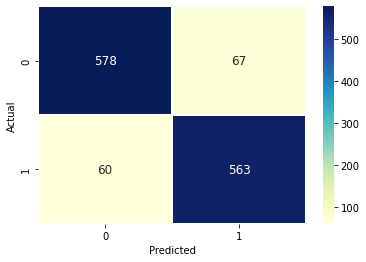

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), linewidths=2, linecolor='w', cmap='YlGnBu',
            annot=True, fmt='.0f', annot_kws={"fontsize":12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
from sklearn.naive_bayes import GaussianNB
naive_bay = GaussianNB()

naive_bay.fit(X_train, y_train.values.ravel())

y_pred = naive_bay.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[640   5]
 [532  91]]
              precision    recall  f1-score   support

           0       0.55      0.99      0.70       645
           1       0.95      0.15      0.25       623

    accuracy                           0.58      1268
   macro avg       0.75      0.57      0.48      1268
weighted avg       0.74      0.58      0.48      1268



In [41]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train.values.ravel())

y_pred = svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[569  76]
 [ 63 560]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       645
           1       0.88      0.90      0.89       623

    accuracy                           0.89      1268
   macro avg       0.89      0.89      0.89      1268
weighted avg       0.89      0.89      0.89      1268

